# Data Processing

In [1]:
!source venv/bin/activate

In [1]:
# Read data
import pandas as pd
data = pd.read_csv('nyc-rolling-sales.csv')
pd.set_option('display.max_columns', None)

In [2]:
# remove "0" and "-" values on SALE PRICE into DataFrame
data_price = data[(data['SALE PRICE'] != ' -  ')]
data_price = data_price[(data_price['SALE PRICE'] != '0')]

In [3]:
# get "0" values on SALE PRICE into DataFrame
no_sale_price = data[(data['SALE PRICE'] == '0')] 
unique_zip_codes_zero_price = list(set(no_sale_price['ZIP CODE'].values))

# replace zero(0) values to average based on zip code
import numpy as np

for zip_code in unique_zip_codes_zero_price:
    # calculate average on zip code
    df = data_price[data_price['ZIP CODE'] == zip_code]
    mean = df['SALE PRICE'].apply(int).mean()
    
    # fix values
    fixed_df = data[data['ZIP CODE'] == zip_code]
    fixed_df['SALE PRICE'] = np.where(fixed_df['SALE PRICE'] == '0', str(mean) + ' *', fixed_df['SALE PRICE'])
    #fixed_df['SALE PRICE'] = np.where(fixed_df['SALE PRICE'] == ' -  ', str(mean) + ' *', fixed_df['SALE PRICE'])
    indices = fixed_df.index.to_list()
    for i, price in enumerate(fixed_df['SALE PRICE']):
        price_str = str(price)
        if price_str.split(' ')[-1] == '*':
            data['SALE PRICE'].iloc[indices[i]] = mean
    #print(f"zip code {zip_code}, average {str(mean)}")

/tmp/ipykernel_33564/3573056725.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed_df['SALE PRICE'] = np.where(fixed_df['SALE PRICE'] == '0', str(mean) + ' *', fixed_df['SALE PRICE'])
/home/ak/Desktop/sentiment-data-visualize/env/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [4]:
# get "-" values on SALE PRICE into DataFrame
no_sale_price = data[(data['SALE PRICE'] == ' -  ')] #| (data['SALE PRICE'] == ' -  ')]['SALE PRICE'].value_counts()
unique_zip_codes_none_price = list(set(no_sale_price['ZIP CODE'].values))

# replace ' -  ' values to average based on zip code
import numpy as np
c = 0
for zip_code in unique_zip_codes_none_price:
    # calculate average on zip code
    df = data_price[data_price['ZIP CODE'] == zip_code]
    if df.shape[0]:
        mean = df['SALE PRICE'].apply(int).mean()
    
        # fix values
        fixed_df = data[data['ZIP CODE'] == zip_code]
        #fixed_df['SALE PRICE'] = np.where(fixed_df['SALE PRICE'] == '0', str(mean) + ' *', fixed_df['SALE PRICE'])
        fixed_df['SALE PRICE'] = np.where(fixed_df['SALE PRICE'] == ' -  ', str(mean) + ' *', fixed_df['SALE PRICE'])
        indices = fixed_df.index.to_list()
        for i, price in enumerate(fixed_df['SALE PRICE']):
            price_str = str(price)
            if price_str.split(' ')[-1] == '*':
                c+=1
                data['SALE PRICE'].iloc[indices[i]] = mean
    
    #print(f"zip code {zip_code}, average {str(mean)}")


/tmp/ipykernel_33564/235548538.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed_df['SALE PRICE'] = np.where(fixed_df['SALE PRICE'] == ' -  ', str(mean) + ' *', fixed_df['SALE PRICE'])


In [5]:
data.shape

(84548, 22)

In [15]:
# remove single data
remove_data_indices = data[data['SALE PRICE'] == ' -  '].index
for idx in remove_data_indices:
    data = data.drop(idx)

data['SALE PRICE'] = data['SALE PRICE'].apply(int)
data.shape

(60712, 22)

In [16]:
data.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,60712.000000,60712.000000,60712.000000,60712.000000,60712.000000,60712.000000,60712.000000,60712.000000,60712.000000,60712.000000,6.071200e+04
mean,10182.456467,3.226216,4639.536270,365.573956,10916.089752,2.757511,0.268925,3.059000,1951.350392,1.498847,1.549935e+06
std,7410.989908,1.199734,3686.221825,604.644249,605.756029,19.649655,10.281249,22.306627,37.034456,0.843349,1.200780e+07
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1680.000000,1.000000,1.000000e+00
25%,3910.000000,3.000000,1512.750000,25.000000,10314.000000,1.000000,0.000000,1.000000,1920.000000,1.000000,4.825910e+05
50%,8245.000000,3.000000,3972.000000,53.000000,11215.000000,1.000000,0.000000,1.000000,1940.000000,1.000000,7.308550e+05
75%,16222.000000,4.000000,6749.000000,655.500000,11360.000000,2.000000,0.000000,2.000000,1986.000000,2.000000,1.217946e+06
max,26739.000000,5.000000,16322.000000,8160.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000,2.210000e+09


In [8]:
# remove data if built year and total units are equal to 0
data = data.loc[(data["YEAR BUILT"] > 0) & (data["TOTAL UNITS"] > 0)]
data.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,60712.000000,60712.000000,60712.000000,60712.000000,60712.000000,60712.000000,60712.000000,60712.000000,60712.000000,60712.000000,6.071200e+04
mean,10182.456467,3.226216,4639.536270,365.573956,10916.089752,2.757511,0.268925,3.059000,1951.350392,1.498847,1.549936e+06
std,7410.989908,1.199734,3686.221825,604.644249,605.756029,19.649655,10.281249,22.306627,37.034456,0.843349,1.200780e+07
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1680.000000,1.000000,1.000000e+00
25%,3910.000000,3.000000,1512.750000,25.000000,10314.000000,1.000000,0.000000,1.000000,1920.000000,1.000000,4.825916e+05
50%,8245.000000,3.000000,3972.000000,53.000000,11215.000000,1.000000,0.000000,1.000000,1940.000000,1.000000,7.308558e+05
75%,16222.000000,4.000000,6749.000000,655.500000,11360.000000,2.000000,0.000000,2.000000,1986.000000,2.000000,1.217947e+06
max,26739.000000,5.000000,16322.000000,8160.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000,2.210000e+09


In [10]:
data.shape

(60712, 22)

In [11]:
# Feature selection
for col in data.columns:
    size = len(list(set(data[col].values)))
    print(f"There are {size}\t unit '{col}'\t Type: {data[col].dtype}")

There are 25807	 unit 'Unnamed: 0'	 Type: int64
There are 5	 unit 'BOROUGH'	 Type: int64
There are 252	 unit 'NEIGHBORHOOD'	 Type: object
There are 44	 unit 'BUILDING CLASS CATEGORY'	 Type: object
There are 9	 unit 'TAX CLASS AT PRESENT'	 Type: object
There are 11295	 unit 'BLOCK'	 Type: int64
There are 2220	 unit 'LOT'	 Type: int64
There are 1	 unit 'EASE-MENT'	 Type: object
There are 153	 unit 'BUILDING CLASS AT PRESENT'	 Type: object
There are 47432	 unit 'ADDRESS'	 Type: object
There are 3403	 unit 'APARTMENT NUMBER'	 Type: object
There are 184	 unit 'ZIP CODE'	 Type: int64
There are 176	 unit 'RESIDENTIAL UNITS'	 Type: int64
There are 55	 unit 'COMMERCIAL UNITS'	 Type: int64
There are 190	 unit 'TOTAL UNITS'	 Type: int64
There are 5680	 unit 'LAND SQUARE FEET'	 Type: object
There are 5659	 unit 'GROSS SQUARE FEET'	 Type: object
There are 150	 unit 'YEAR BUILT'	 Type: int64
There are 3	 unit 'TAX CLASS AT TIME OF SALE'	 Type: int64
There are 153	 unit 'BUILDING CLASS AT TIME OF SAL

In [17]:
data_train = data.drop(['Unnamed: 0', 'EASE-MENT', 'APARTMENT NUMBER', 'SALE DATE'], axis=1)
data_train.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,60712.000000,60712.000000,60712.000000,60712.000000,60712.000000,60712.000000,60712.000000,60712.000000,60712.000000,6.071200e+04
mean,3.226216,4639.536270,365.573956,10916.089752,2.757511,0.268925,3.059000,1951.350392,1.498847,1.549935e+06
std,1.199734,3686.221825,604.644249,605.756029,19.649655,10.281249,22.306627,37.034456,0.843349,1.200780e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1680.000000,1.000000,1.000000e+00
25%,3.000000,1512.750000,25.000000,10314.000000,1.000000,0.000000,1.000000,1920.000000,1.000000,4.825910e+05
50%,3.000000,3972.000000,53.000000,11215.000000,1.000000,0.000000,1.000000,1940.000000,1.000000,7.308550e+05
75%,4.000000,6749.000000,655.500000,11360.000000,2.000000,0.000000,2.000000,1986.000000,2.000000,1.217946e+06
max,5.000000,16322.000000,8160.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000,2.210000e+09


In [18]:
data_train

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616,18690,1900,2,C7,1968964
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212,7803,1900,2,C7,1968964
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272,6794,1913,2,C4,3936272
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369,4615,1900,2,C2,8000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,0,2,2400,2575,1998,1,B9,450000
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,0,2,2498,2377,1998,1,B9,550000
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,0,2,4000,1496,1925,1,B2,460000
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,7,7,208033,64117,2001,4,K6,11693337


In [19]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60712 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         60712 non-null  int64 
 1   NEIGHBORHOOD                    60712 non-null  object
 2   BUILDING CLASS CATEGORY         60712 non-null  object
 3   TAX CLASS AT PRESENT            60712 non-null  object
 4   BLOCK                           60712 non-null  int64 
 5   LOT                             60712 non-null  int64 
 6   BUILDING CLASS AT PRESENT       60712 non-null  object
 7   ADDRESS                         60712 non-null  object
 8   ZIP CODE                        60712 non-null  int64 
 9   RESIDENTIAL UNITS               60712 non-null  int64 
 10  COMMERCIAL UNITS                60712 non-null  int64 
 11  TOTAL UNITS                     60712 non-null  int64 
 12  LAND SQUARE FEET                60712 non-null

<AxesSubplot:>

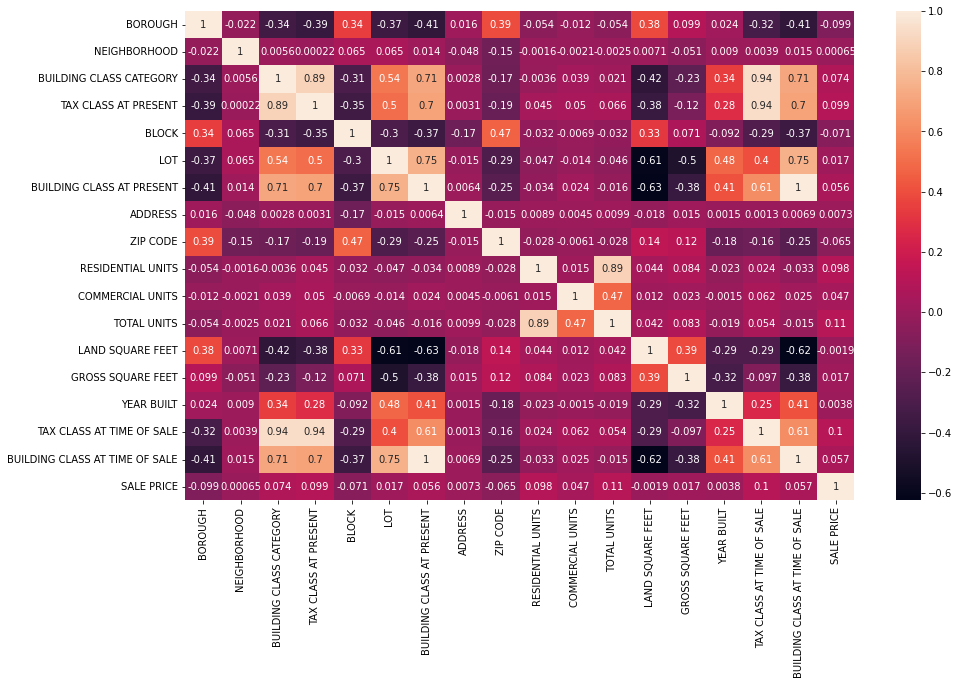

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_train['NEIGHBORHOOD'] = le.fit_transform(data_train['NEIGHBORHOOD'])
data_train['BUILDING CLASS CATEGORY'] = le.fit_transform(data_train['BUILDING CLASS CATEGORY'])
data_train['TAX CLASS AT PRESENT'] = le.fit_transform(data_train['TAX CLASS AT PRESENT'])
data_train['BUILDING CLASS AT PRESENT'] = le.fit_transform(data_train['BUILDING CLASS AT PRESENT'])
data_train['ADDRESS'] = le.fit_transform(data_train['ADDRESS'])
data_train['LAND SQUARE FEET'] = le.fit_transform(data_train['LAND SQUARE FEET'])
data_train['GROSS SQUARE FEET'] = le.fit_transform(data_train['GROSS SQUARE FEET'])
data_train['BUILDING CLASS AT TIME OF SALE'] = le.fit_transform(data_train['BUILDING CLASS AT TIME OF SALE'])

fig = plt.figure(figsize = (15, 9))
sns.heatmap(data_train.corr(), annot=True)

In [21]:
# Feature selection
for col in data_train.columns:
    size = len(list(set(data[col].values)))
    print(f"There are {size}\t unit '{col}'\t Type: {data[col].dtype}")

There are 5	 unit 'BOROUGH'	 Type: int64
There are 252	 unit 'NEIGHBORHOOD'	 Type: object
There are 44	 unit 'BUILDING CLASS CATEGORY'	 Type: object
There are 9	 unit 'TAX CLASS AT PRESENT'	 Type: object
There are 11295	 unit 'BLOCK'	 Type: int64
There are 2220	 unit 'LOT'	 Type: int64
There are 153	 unit 'BUILDING CLASS AT PRESENT'	 Type: object
There are 47432	 unit 'ADDRESS'	 Type: object
There are 184	 unit 'ZIP CODE'	 Type: int64
There are 176	 unit 'RESIDENTIAL UNITS'	 Type: int64
There are 55	 unit 'COMMERCIAL UNITS'	 Type: int64
There are 190	 unit 'TOTAL UNITS'	 Type: int64
There are 5680	 unit 'LAND SQUARE FEET'	 Type: object
There are 5659	 unit 'GROSS SQUARE FEET'	 Type: object
There are 150	 unit 'YEAR BUILT'	 Type: int64
There are 3	 unit 'TAX CLASS AT TIME OF SALE'	 Type: int64
There are 153	 unit 'BUILDING CLASS AT TIME OF SALE'	 Type: object
There are 8173	 unit 'SALE PRICE'	 Type: int64


In [36]:
selected_features = []
# Feature selection
for col in data_train.columns:
    if data_train[col].dtype == int:
        selected_features.append(col)
selected_features

['BOROUGH',
 'ZIP CODE',
 'RESIDENTIAL UNITS',
 'COMMERCIAL UNITS',
 'TOTAL UNITS',
 'YEAR BUILT',
 'TAX CLASS AT TIME OF SALE',
 'NUM NEIGHBORHOOD',
 'NUM BUILDING CLASS CATEGORY',
 'NUM TAX CLASS AT PRESENT',
 'NUM BUILDING CLASS AT PRESENT',
 'NUM BUILDING CLASS AT TIME OF SALE']

In [62]:
train['SALE PRICE'] = data['SALE PRICE'].apply(int)
type(train['SALE PRICE'].loc[0])

/tmp/ipykernel_24070/3632113648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['SALE PRICE'] = data['SALE PRICE'].apply(int)


numpy.int64

In [66]:
train = data_train[selected_features]
target = data['SALE PRICE'].apply(int)

# YENI

In [24]:
selected = [col for col in data_train.columns if col != 'SALE PRICE']
target = data_train['SALE PRICE']
features = data_train[selected]

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=55)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=55)

In [28]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
lr.score(X_test, y_test)

0.0699321028795814

In [36]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.0699321028795814

# random forest regressor

In [30]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [39]:
from sklearn.metrics import r2_score, accuracy_score


y_pred = rfr.predict(X_test)
r2_score(y_test, y_pred)

0.7473760216741592

In [ ]:
accuracy_score(y_test, y_pred)

In [34]:
y_test

21538     779837
74014      15000
6168      307242
75664     450000
76889     630651
          ...   
43388    1020589
66981    1100000
25387     995476
5166     1645000
4630     3578131
Name: SALE PRICE, Length: 9107, dtype: int64

# random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

In [ ]:
rfc